# 朴素贝叶斯

## 【关键词】

- 朴素：独立性假设
- 贝叶斯公式

优点：
- 朴素贝叶斯模型发源于古典数学理论，有着坚实的数学基础，以及稳定的分类效率；
- 对小规模的数据表现很好；
- 能处理多分类任务，适合增量式训练；
- 对缺失数据不太敏感，算法也比较简单，常用于文本分类

缺点：
- 只能用于分类问题
- 需要计算先验概率；
- 分类决策存在错误率；
- 对输入数据的表达形式很敏感

## 一、朴素贝叶斯原理

朴素贝叶斯算法是一个典型的统计学习方法，主要理论基础就是一个贝叶斯公式，贝叶斯公式的基本定义如下：

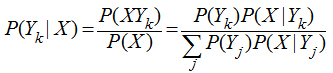

这个公式虽然看上去简单，但它却能总结历史，预知未来：
- 公式的右边是总结历史
- 公式的左边是预知未来

如果把Y看成类别，X看成特征，P(Yk|X)就是在已知特征X的情况下求Yk类别的概率，而对P(Yk|X)的计算又全部转化到类别Yk的特征分布上来。

举个例子，大学的时候，某男生经常去图书室晚自习，发现他喜欢的那个女生也常去那个自习室，心中窃喜，于是每天买点好吃点在那个自习室蹲点等她来，可是人家女生不一定每天都来，眼看天气渐渐炎热，图书馆又不开空调，如果那个女生没有去自修室，该男生也就不去，每次男生鼓足勇气说：“嘿，你明天还来不？”,“啊，不知道，看情况”。

然后该男生每天就把她去自习室与否以及一些其他情况做一下记录，用Y表示该女生是否去自习室，即Y={去，不去}，X是跟去自修室有关联的一系列条件，比如当天上了哪门主课，蹲点统计了一段时间后，该男生打算今天不再蹲点，而是先预测一下她会不会去，现在已经知道了今天上了常微分方法这么主课，于是计算P(Y=去|常微分方程)与P(Y=不去|常微分方程)，看哪个概率大，如果P(Y=去|常微分方程) >P(Y=不去|常微分方程)，那这个男生不管多热都屁颠屁颠去自习室了，否则不就去自习室受罪了。P(Y=去|常微分方程)的计算可以转为计算以前她去的情况下，那天主课是常微分的概率P(常微分方程|Y=去)，注意公式右边的分母对每个类别（去/不去）都是一样的，所以计算的时候忽略掉分母，这样虽然得到的概率值已经不再是0~1之间，但是通过比较大小还是能选择类别。

后来他发现还有一些其他条件可以挖，比如当天星期几、当天的天气，以及上一次与她在自修室的气氛，统计了一段时间后，该男子一计算，发现不好算了，因为总结历史的公式：

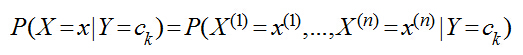

这里n=3，x(1)表示主课，x(2)表示天气，x(3)表示星期几，x(4)表示气氛，Y仍然是{去，不去}，现在主课有8门，天气有晴、雨、阴三种、气氛有A+,A,B+,B，C五种，那么总共需要估计的参数有8×3×7×5×2=1680个，每天只能收集到一条数据，那么等凑齐1680条数据，大学都毕业了，男生大呼不妙，于是做了一个独立性假设，假设这些影响她去自习室的原因是独立互不相关的，于是：

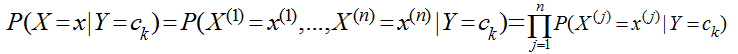

有了这个独立假设后，需要估计的参数就变为，(8+3+7+5)×2 = 46个了，而且每天收集的一条数据，可以提供4个参数，这样该男生就预测越来越准了。


In [ ]:
# P(Y=去|常微分方程)与P(Y=不去|常微分方程)，看哪个概率大

P(Y=去|常微分方程) = P(Y = 去)*P(常微分方程|Y=去)/P(常微分方程)

朴素的概念：独立性假设，假设各个特征之间是独立不相关的。

In [1]:
# 满足条件情况下嫁人概率
P1 = (1/2*1/6*1/6*1/6*1/2)/(5/12*1/3*7/12*1/3)
P1

0.042857142857142844

In [2]:
# 满足条件下，不嫁概率
P2 = ((1/6*1/2*1*1/2)*1/2)/(1/3*1/3*7/12*1/3)
P2

0.9642857142857143

In [3]:
P2 > P1

True

In [ ]:
计算机做出抉择：满足条件下，不嫁

### 朴素贝叶斯分类器

讲了上面的小故事，我们来朴素贝叶斯分类器的表示形式：

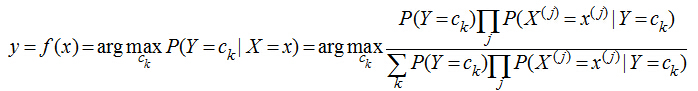

当特征为为x时，计算所有类别的条件概率，选取条件概率最大的类别作为待分类的类别。由于上公式的分母对每个类别都是一样的，因此计算时可以不考虑分母，即

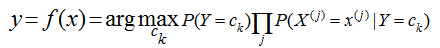

朴素贝叶斯的朴素体现在其对各个条件的独立性假设上，加上独立假设后，大大减少了参数假设空间。

### 在文本分类上的应用

文本分类的应用很多，比如垃圾邮件和垃圾短信的过滤就是一个2分类问题，新闻分类、文本情感分析等都可以看成是文本分类问题，分类问题由两步组成：训练和预测，要建立一个分类模型，至少需要有一个训练数据集。贝叶斯模型可以很自然地应用到文本分类上：现在有一篇文档d（Document），判断它属于哪个类别ck，只需要计算文档d属于哪一个类别的概率最大：

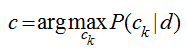

在分类问题中，我们并不是把所有的特征都用上，对一篇文档d，我们只用其中的部分特征词项t1,t2,...,tnd（nd表示d中的总词条数目），因为很多词项对分类是没有价值的，比如一些停用词“的,是,在”在每个类别中都会出现，这个词项还会模糊分类的决策面，关于特征词的选取，我的这篇文章有介绍。用特征词项表示文档后，计算文档d的类别转化为：

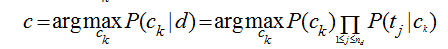

注意P(Ck|d)只是正比于后面那部分公式，完整的计算还有一个分母，但我们前面讨论了，对每个类别而已分母都是一样的，于是在我们只需要计算分子就能够进行分类了。实际的计算过程中，多个概率值P(tj|ck)的连乘很容易下溢出为0，因此转化为对数计算，连乘就变成了累加：

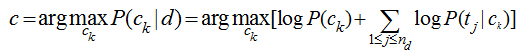

我们只需要从训练数据集中，计算每一个类别的出现概率P(ck)和每一个类别中各个特征词项的概率P(tj|ck)，而这些概率值的计算都采用最大似然估计，说到底*就是统计每个词在各个类别中出现的次数和各个类别的文档的数目*：

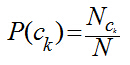
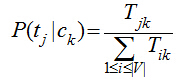

## 二、3种贝叶斯模型

### 1、高斯分布朴素贝叶斯

高斯分布就是正态分布

【用途】用于一般分类问题

使用自带的鸢尾花数据

In [5]:
import sklearn.datasets as datasets

In [6]:
iris = datasets.load_iris()
X = iris['data']
y = iris['target']

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([32., 41., 42., 24., 11.]),
 array([4.3 , 5.02, 5.74, 6.46, 7.18, 7.9 ]),
 <a list of 5 Patch objects>)

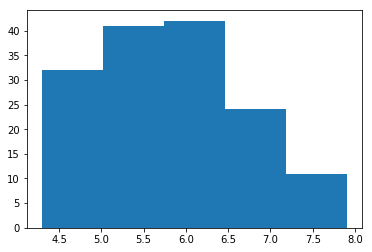

In [21]:
plt.hist(X[:,0],bins=5)

(array([49.,  8., 41., 29., 23.]),
 array([0.1 , 0.58, 1.06, 1.54, 2.02, 2.5 ]),
 <a list of 5 Patch objects>)

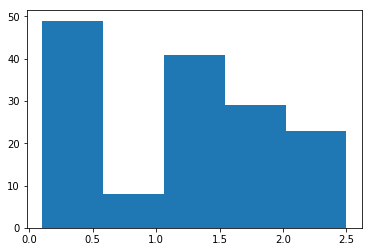

In [23]:
plt.hist(X[:,-1],bins=5)

In [4]:
# 数据分布满足高斯分布正太分布，GaussianNB，效果很好
# BernoulliNB 二分布，硬币，正面反面，概率差不多
# MultinomialNB 投掷筛子，多分布，6个面概率差不多
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [17]:
gNB = GaussianNB()

gNB.fit(X_train,y_train)

gNB.score(X_test,y_test)

0.9

### 2、多项式分布朴素贝叶斯

多项式分布：

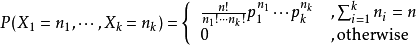

【用途】适用于文本数据（特征表示的是次数，例如某个词语的出现次数）

#### 例：延续上面，使用鸢尾花数据

In [18]:
mNB = MultinomialNB()

mNB.fit(X_train,y_train)

mNB.score(X_test,y_test)

0.9

### 3、伯努利分布朴素贝叶斯

伯努利分布：

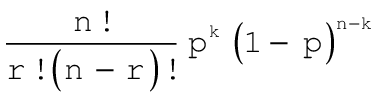

【用途】适用于伯努利分布，也适用于文本数据（此时特征表示的是是否出现，例如某个词语的出现为1，不出现为0）

绝大多数情况下表现不如多项式分布，但有的时候伯努利分布表现得要比多项式分布要好，尤其是对于小数量级的文本数据

#### 例：继续使用鸢尾花数据集

In [24]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [25]:
bNB = BernoulliNB()

bNB.fit(X_train,y_train)

bNB.score(X_test,y_test)

0.26666666666666666

## 三、文本分类实战

对短信进行二分类，数据为SMSSpamCollection

In [26]:
import pandas as pd



In [30]:
data = pd.read_csv('../data/SMSSpamCollection',sep = '\t',header=None,names=['target','message'])
data.shape

(5572, 2)

In [31]:
data.head()

,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [32]:
X = data['message']
y = data['target']

In [34]:
X.unique().size

5169

In [35]:
# 统计词频
from sklearn.feature_extraction.text import CountVectorizer

In [36]:
cv = CountVectorizer()

In [38]:
X_cv = cv.fit_transform(X)
X_cv

<5572x8713 sparse matrix of type '<class 'numpy.int64'>'
	with 74169 stored elements in Compressed Sparse Row format>

In [49]:
cv.vocabulary_

{'go': 3571,
 'until': 8084,
 'jurong': 4374,
 'point': 5958,
 'crazy': 2338,
 'available': 1316,
 'only': 5571,
 'in': 4114,
 'bugis': 1767,
 'great': 3655,
 'world': 8548,
 'la': 4501,
 'buffet': 1765,
 'cine': 2061,
 'there': 7694,
 'got': 3615,
 'amore': 1082,
 'wat': 8324,
 'ok': 5538,
 'lar': 4537,
 'joking': 4342,
 'wif': 8450,
 'oni': 5567,
 'free': 3373,
 'entry': 2963,
 'wkly': 8506,
 'comp': 2178,
 'to': 7806,
 'win': 8463,
 'fa': 3100,
 'cup': 2398,
 'final': 3221,
 'tkts': 7793,
 '21st': 412,
 'may': 4959,
 '2005': 403,
 'text': 7644,
 '87121': 794,
 'receive': 6340,
 'question': 6232,
 'std': 7279,
 'txt': 7986,
 'rate': 6284,
 'apply': 1169,
 '08452810075over18': 77,
 'dun': 2815,
 'say': 6679,
 'so': 7074,
 'early': 2836,
 'hor': 3952,
 'already': 1054,
 'then': 7688,
 'nah': 5270,
 'don': 2724,
 'think': 7709,
 'he': 3805,
 'goes': 3579,
 'usf': 8130,
 'lives': 4692,
 'around': 1220,
 'here': 3856,
 'though': 7729,
 'freemsg': 3380,
 'hey': 3866,
 'darling': 2455,
 'it

In [46]:
X.iloc[-1]

'Rofl. Its true to its name'

In [39]:
print(X_cv)

  (0, 8324)	1
  (0, 1082)	1
  (0, 3615)	1
  (0, 7694)	1
  (0, 2061)	1
  (0, 1765)	1
  (0, 4501)	1
  (0, 8548)	1
  (0, 3655)	1
  (0, 1767)	1
  (0, 4114)	1
  (0, 5571)	1
  (0, 1316)	1
  (0, 2338)	1
  (0, 5958)	1
  (0, 4374)	1
  (0, 8084)	1
  (0, 3571)	1
  (1, 5567)	1
  (1, 8450)	1
  (1, 4342)	1
  (1, 4537)	1
  (1, 5538)	1
  (2, 77)	1
  (2, 1169)	1
  :	:
  (5570, 1802)	1
  (5570, 3489)	1
  (5570, 2905)	1
  (5570, 7099)	1
  (5570, 1794)	1
  (5570, 8120)	1
  (5570, 2606)	1
  (5570, 5367)	1
  (5570, 1451)	1
  (5570, 7674)	1
  (5570, 3323)	1
  (5570, 7089)	1
  (5570, 4642)	1
  (5570, 1097)	1
  (5570, 8371)	1
  (5570, 4245)	1
  (5570, 3805)	1
  (5570, 7806)	1
  (5570, 3373)	1
  (5570, 4114)	1
  (5571, 6548)	1
  (5571, 7938)	1
  (5571, 4253)	2
  (5571, 5276)	1
  (5571, 7806)	1


In [50]:
X_cv

<5572x8713 sparse matrix of type '<class 'numpy.int64'>'
	with 74169 stored elements in Compressed Sparse Row format>

In [51]:
X_train,X_test,y_train,y_test = train_test_split(X_cv,y,test_size =0.2 )

In [62]:
%%time
gNB = GaussianNB()

gNB.fit(X_train.toarray(),y_train)

s = gNB.score(X_test.toarray(),y_test)
print(s)

0.8986547085201794
Wall time: 1.71 s


In [63]:
%%time
mNB = MultinomialNB()

mNB.fit(X_train,y_train)

print(mNB.score(X_test,y_test))

0.97847533632287
Wall time: 17.8 ms


In [64]:
cv = CountVectorizer(stop_words='english')

In [66]:
X_cv

<5572x8713 sparse matrix of type '<class 'numpy.int64'>'
	with 74169 stored elements in Compressed Sparse Row format>

In [65]:
X_cv2 = cv.fit_transform(X)
X_cv2

<5572x8444 sparse matrix of type '<class 'numpy.int64'>'
	with 43578 stored elements in Compressed Sparse Row format>

In [67]:
%%time

X_train,X_test,y_train,y_test = train_test_split(X_cv2,y,test_size = 0.2)

mNB = MultinomialNB()

mNB.fit(X_train,y_train)

print(mNB.score(X_test,y_test))

0.979372197309417
Wall time: 18.8 ms


In [54]:
bNB = BernoulliNB()

bNB.fit(X_train,y_train)

bNB.score(X_test,y_test)

0.9766816143497757

In [55]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier

In [57]:
knn = KNeighborsClassifier()

knn.fit(X_train,y_train)

knn.score(X_test,y_test)

0.9121076233183857

In [58]:
clf = DecisionTreeClassifier()

clf.fit(X_train,y_train)

clf.score(X_test,y_test)

0.9668161434977578

导包  
导入sklearn.feature_extraction.text.TfidfVectorizer用于转换字符串  
读取短信数据

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [71]:
X.shape

(5572,)

In [70]:
# Equivalent to CountVectorizer followed by TfidfTransformer.
# term frequency 词频，idf inverse documents frequency
# 相当于对词频，加了权重
# 的，了，你，我，他分类，作用不大，因为所有文章，都出现很多
# 作为分类的词，特点：一类文章中，出现次数很多，其他文章中出现很少
tf_idf = TfidfVectorizer()

X3 = tf_idf.fit_transform(X)
X3

<5572x8713 sparse matrix of type '<class 'numpy.float64'>'
	with 74169 stored elements in Compressed Sparse Row format>

In [76]:
X_train,X_test,y_train,y_test = train_test_split(X3,y,test_size = 0.2)

mNB = MultinomialNB()

mNB.fit(X_train,y_train)

print(mNB.score(X_test,y_test))

0.9641255605381166


In [77]:
from sklearn.feature_extraction.text import HashingVectorizer

In [79]:
hv = HashingVectorizer()

X4 = hv.fit_transform(X)

X4

<5572x1048576 sparse matrix of type '<class 'numpy.float64'>'
	with 74169 stored elements in Compressed Sparse Row format>

In [82]:
print(X4)

  (0, 217534)	0.23570226039551587
  (0, 298067)	-0.23570226039551587
  (0, 304864)	0.23570226039551587
  (0, 307669)	0.23570226039551587
  (0, 346524)	0.23570226039551587
  (0, 396254)	-0.23570226039551587
  (0, 481047)	0.23570226039551587
  (0, 528700)	-0.23570226039551587
  (0, 604544)	0.23570226039551587
  (0, 630479)	-0.23570226039551587
  (0, 639749)	-0.23570226039551587
  (0, 653949)	-0.23570226039551587
  (0, 707424)	-0.23570226039551587
  (0, 787517)	0.23570226039551587
  (0, 809054)	0.23570226039551587
  (0, 828689)	0.23570226039551587
  (0, 859130)	0.23570226039551587
  (0, 992018)	0.23570226039551587
  (1, 284109)	0.4472135954999579
  (1, 338849)	-0.4472135954999579
  (1, 374789)	-0.4472135954999579
  (1, 536132)	-0.4472135954999579
  (1, 913144)	0.4472135954999579
  (2, 32615)	0.1643989873053573
  (2, 34389)	0.1643989873053573
  :	:
  (5570, 174974)	-0.20412414523193154
  (5570, 180525)	-0.20412414523193154
  (5570, 189643)	-0.20412414523193154
  (5570, 221403)	-0.204124145

In [86]:
import numpy as np
print(np.abs(X4))

  (0, 217534)	0.23570226039551587
  (0, 298067)	0.23570226039551587
  (0, 304864)	0.23570226039551587
  (0, 307669)	0.23570226039551587
  (0, 346524)	0.23570226039551587
  (0, 396254)	0.23570226039551587
  (0, 481047)	0.23570226039551587
  (0, 528700)	0.23570226039551587
  (0, 604544)	0.23570226039551587
  (0, 630479)	0.23570226039551587
  (0, 639749)	0.23570226039551587
  (0, 653949)	0.23570226039551587
  (0, 707424)	0.23570226039551587
  (0, 787517)	0.23570226039551587
  (0, 809054)	0.23570226039551587
  (0, 828689)	0.23570226039551587
  (0, 859130)	0.23570226039551587
  (0, 992018)	0.23570226039551587
  (1, 284109)	0.4472135954999579
  (1, 338849)	0.4472135954999579
  (1, 374789)	0.4472135954999579
  (1, 536132)	0.4472135954999579
  (1, 913144)	0.4472135954999579
  (2, 32615)	0.1643989873053573
  (2, 34389)	0.1643989873053573
  :	:
  (5570, 174974)	0.20412414523193154
  (5570, 180525)	0.20412414523193154
  (5570, 189643)	0.20412414523193154
  (5570, 221403)	0.20412414523193154
  (55

In [87]:
X_train,X_test,y_train,y_test = train_test_split(np.abs(X4),y,test_size = 0.2)

mNB = MultinomialNB()

mNB.fit(X_train,y_train)

print(mNB.score(X_test,y_test))

0.8860986547085202


In [90]:
hv.tokenizer

In [91]:
cv.vocabulary_

{'jurong': 4248,
 'point': 5779,
 'crazy': 2282,
 'available': 1284,
 'bugis': 1719,
 'great': 3555,
 'world': 8285,
 'la': 4374,
 'buffet': 1717,
 'cine': 2007,
 'got': 3515,
 'amore': 1064,
 'wat': 8083,
 'ok': 5377,
 'lar': 4410,
 'joking': 4216,
 'wif': 8191,
 'oni': 5403,
 'free': 3280,
 'entry': 2889,
 'wkly': 8243,
 'comp': 2123,
 'win': 8203,
 'fa': 3018,
 'cup': 2341,
 'final': 3135,
 'tkts': 7569,
 '21st': 412,
 '2005': 403,
 'text': 7437,
 '87121': 794,
 'receive': 6158,
 'question': 6052,
 'std': 7077,
 'txt': 7754,
 'rate': 6104,
 'apply': 1141,
 '08452810075over18': 77,
 'dun': 2751,
 'say': 6496,
 'early': 2770,
 'hor': 3840,
 'nah': 5124,
 'don': 2663,
 'think': 7492,
 'goes': 3479,
 'usf': 7892,
 'lives': 4562,
 'freemsg': 3287,
 'hey': 3757,
 'darling': 2398,
 'week': 8129,
 'word': 8276,
 'like': 4512,
 'fun': 3342,
 'tb': 7372,
 'xxx': 8350,
 'chgs': 1961,
 'send': 6584,
 '50': 616,
 'rcv': 6116,
 'brother': 1689,
 'speak': 6959,
 'treat': 7687,
 'aids': 997,
 'pate

In [92]:
tf_idf.vocabulary_

{'go': 3571,
 'until': 8084,
 'jurong': 4374,
 'point': 5958,
 'crazy': 2338,
 'available': 1316,
 'only': 5571,
 'in': 4114,
 'bugis': 1767,
 'great': 3655,
 'world': 8548,
 'la': 4501,
 'buffet': 1765,
 'cine': 2061,
 'there': 7694,
 'got': 3615,
 'amore': 1082,
 'wat': 8324,
 'ok': 5538,
 'lar': 4537,
 'joking': 4342,
 'wif': 8450,
 'oni': 5567,
 'free': 3373,
 'entry': 2963,
 'wkly': 8506,
 'comp': 2178,
 'to': 7806,
 'win': 8463,
 'fa': 3100,
 'cup': 2398,
 'final': 3221,
 'tkts': 7793,
 '21st': 412,
 'may': 4959,
 '2005': 403,
 'text': 7644,
 '87121': 794,
 'receive': 6340,
 'question': 6232,
 'std': 7279,
 'txt': 7986,
 'rate': 6284,
 'apply': 1169,
 '08452810075over18': 77,
 'dun': 2815,
 'say': 6679,
 'so': 7074,
 'early': 2836,
 'hor': 3952,
 'already': 1054,
 'then': 7688,
 'nah': 5270,
 'don': 2724,
 'think': 7709,
 'he': 3805,
 'goes': 3579,
 'usf': 8130,
 'lives': 4692,
 'around': 1220,
 'here': 3856,
 'though': 7729,
 'freemsg': 3380,
 'hey': 3866,
 'darling': 2455,
 'it

#### tf.fit_transform()

- 参数必须是字符串的一维数组（比如列表或者Series）
- 返回的是一个稀疏矩阵类型的对象，行数为样本数，列数为所有出现的单词统计个数。

这里输入data[1]是Series类型，返回的是一个5572x8713 sparse matrix 
其中5572是data[1]

训练数据

预测数据，使用tf.transform(['xx'])进行转换生成测试数据

## 四、作业

#### 对email进行二分类，两种邮件分别在ham和spam目录下